/tmp/ipykernel_1538/1158605281.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


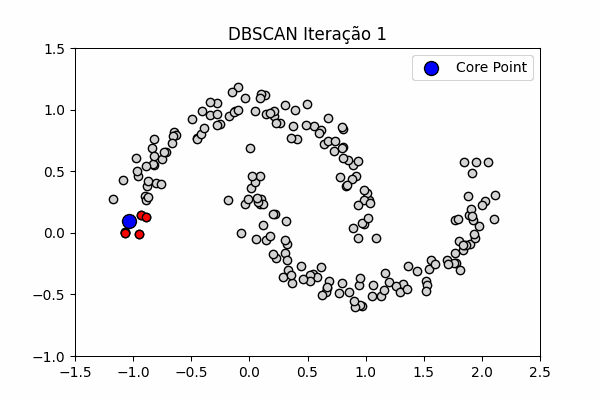

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Gerar dados de exemplo (moons)
X, _ = make_moons(n_samples=200, noise=0.08, random_state=42)

# Parâmetros do DBSCAN
eps = 0.2
min_samples = 5

# Criar vizinhos mais próximos
neigh = NearestNeighbors(radius=eps)
neigh.fit(X)
distances, indices = neigh.radius_neighbors(X, return_distance=True)

# Variáveis para salvar imagens
frames = []

# Configurar Matplotlib
# plt.style.use("seaborn-dark")

# Executar DBSCAN manualmente e gerar frames
visited = set()
clusters = np.full(X.shape[0], -1)  # Inicialmente, todos são ruído
cluster_id = 0

for i in range(len(X)):  
    if i in visited:  
        continue  # Pular se já visitado
    visited.add(i)
    
    # Obter vizinhos dentro do raio eps
    neighbors = indices[i]
    
    if len(neighbors) < min_samples:
        continue  # Ponto é ruído

    # Criar um novo cluster
    clusters[i] = cluster_id
    for neighbor in neighbors:
        if neighbor in visited:
            continue
        visited.add(neighbor)
        clusters[neighbor] = cluster_id
    
    cluster_id += 1
    
    # Criar frame do estado atual
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c="lightgray", edgecolors="k")  # Todos os pontos (cinza)
    plt.scatter(X[neighbors, 0], X[neighbors, 1], c="red", edgecolors="k")  # Pontos do cluster atual
    plt.scatter(X[i, 0], X[i, 1], c="blue", edgecolors="k", s=100, label="Core Point")  # Ponto central
    
    plt.title(f"DBSCAN Iteração {i + 1}")
    plt.legend()
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1, 1.5)
    
    # Salvar frame
    filename = f"imgs/dbscan_frame_{i}.png"
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

# Criar GIF
imageio.mimsave("imgs/dbscan_animation.gif", frames, fps=3)

# Mostrar o GIF no Jupyter Notebook
from IPython.display import Image
Image("imgs/dbscan_animation.gif")
